In [ ]:
#This code vectorizes the connectivity matrices and creates an NxM dataframe of N-subjects by M-edges

In [1]:
import pandas as pd
import matplotlib.style as style
import numpy as np
import os
from pathlib import Path
# import rpy2
# from pymer4 import Lmer
from IPython.display import clear_output
import nilearn.plotting as plotting
from ast import literal_eval

%matplotlib inline
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 500)
pd.set_option('display.width', 1000)

from IPython.core.display import display, HTML
display(HTML("<style>"
    + "#notebook { padding-top:0px !important; } " 
    + ".container { width:100% !important; } "
    + ".end_space { min-height:0px !important; } "
    + "</style>"))


/tmp/ipykernel_1585/3950606182.py:18: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
project_root = Path('/home/ccc98/Documents/CATD-ReliabilityAnalysis/')
QC_dir = project_root / 'data' / 'CATD' / 'derivatives' / 'summary_tables'
refs_path = project_root / 'references'
rest_paths = pd.read_csv(refs_path / 'rest_df.csv')

In [2]:
# #root_dir = Path('C:/Users/chris') # If running in Windows
# #docs_dir = root_dir / 'My Documents') # If running in Windows
# root_dir = Path('/mnt/c/Users/chris') # If running in Linux
# docs_dir = root_dir / 'My Documents' # If running in Linux
# cfds_run = 'ts_extract_ccmp'
# project_root = root_dir / 'OneDrive - Yale University/NIH/Research/database pub'
# corr_dir = project_root / 'nilearn/nilearn'
# run_dir = corr_dir / cfds_run
# jobids = {}

In [4]:
# QC = pd.read_csv(docs_dir / 'MIDQC/local_reports/report csvs/AllQCFiles.csv')
# all_rest_paths = pd.read_csv(corr_dir / 'rest_df_ccmp.csv', index_col=0)
# print(f"Read {len(all_rest_paths)} resting state scans")
# QC = QC.loc[(QC['report_type'] == 'func_rois') & (QC['task'] == 'rest')][['subject', 'session','task', 'run', 'report']]
# rest_paths = all_rest_paths.merge(QC, on=['subject', 'session','task', 'run'])
# print(f"Merging with QC file. There are {len(all_rest_paths) - len(rest_paths)} scans that were not QC'd and {len(QC) - len(rest_paths)} scans that were QC'd but are not in the dataframe")
# print(f"Excluding {len(rest_paths.loc[rest_paths['report'] == 0])} bad scans")
# rest_paths = rest_paths.loc[rest_paths['report'] != 0]
# print(f"Keeping second runs and dropping first run for {len(rest_paths.loc[rest_paths.duplicated(subset = ['subject','session'])])} sessions")
# rest_paths.drop_duplicates(subset = ['subject','session'], keep = 'last', inplace = True)
# print(f"Dropping {len(rest_paths.loc[~rest_paths.duplicated(subset = ['subject'], keep = False)])} subjects with only one session")
# rest_paths = rest_paths.loc[rest_paths.duplicated(subset = ['subject'], keep = False)]
# rest_paths = rest_paths.reset_index().iloc[:,1:]
# print(f"Ended with {len(rest_paths)} scans")


# # Use this to see which rows are only in QC or the dataframe:
# # QC = pd.read_csv('C:/Users/chris/Documents/MIDQC/local_reports/report csvs/AllQCFiles.csv')
# # all_rest_paths = pd.read_csv('C:/Users/chris/OneDrive - Yale University/NIH/Research/database pub/nilearn/nilearn/rest_df_ccmp.csv', index_col=0)
# # ex = all_rest_paths.merge(QC.loc[(QC['report_type'] == 'func_rois') & (QC['task'] == 'rest')], on = ['subject','session','task','run'], how='outer',indicator = True)
# # QC_ex = ex.loc[ex['_merge'] == 'right_only']
# # DF_ex = ex.loc[ex['_merge'] == 'left_only']

(452, 452)


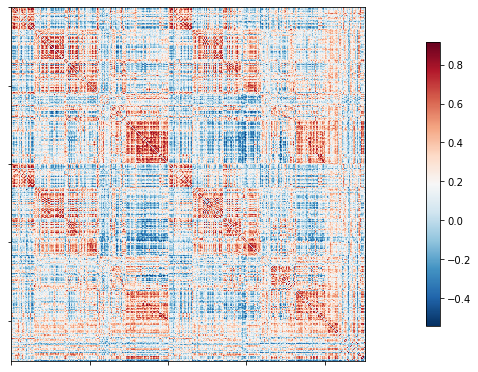

In [13]:
#Get column names for connectome dataframe
row = rest_paths.iloc[0]
example_corr = np.loadtxt(row.rest_corr_notdSchaefersc_path, delimiter = ',')
# example_corr = np.loadtxt(row.rest_corr_notdBasc122_path, delimiter = ',')[:-1,:-1]
print(example_corr.shape)


ax = ['subject', 'session']
for i in range(example_corr.shape[0]):
    for j in range(example_corr.shape[1]):
        if(j < i):
            ax.append('{}_{}'.format(i,j))
            
#Check that correlation matrix structure is preserved
corr_lower = example_corr[np.tril_indices_from(example_corr, k = -1)]
X = np.zeros((example_corr.shape[0],example_corr.shape[0]))
X[np.tril_indices(X.shape[0], k = -1)] = corr_lower.flatten()
X = X + X.T
plotting.plot_matrix(X)

In [14]:
X = np.zeros((rest_paths.shape[0], int(example_corr.shape[0] * (example_corr.shape[0] - 1) / 2)))
for _,row in rest_paths.iterrows():
#     corr = np.loadtxt(row.rest_corr_notdBasc122_path, delimiter = ',')[:-1,:-1]
    corr = np.loadtxt(row.rest_corr_notdSchaefersc_path, delimiter = ',')
    corr_lower = corr[np.tril_indices_from(corr, k = -1)]
    X[_,:] = corr_lower.flatten()
    clear_output(wait=True)
    print(f'Done {_+1} out of {len(rest_paths)}', flush = True)
connectome_df = pd.concat([rest_paths.subject, rest_paths.session, pd.DataFrame(X)], axis = 1)
connectome_df.columns = ax

Done 147 out of 550


KeyboardInterrupt: 

In [19]:
# connectome_df.to_csv(project_root / 'data' / 'processed' / 'connectivity_data' / 'connectome_dataframe_schaefersc.csv', index = False)
connectome_df.to_csv(project_root / 'data' / 'processed' / 'connectivity_data' / 'connectome_dataframe_basc.csv', index = False)

In [44]:
#To be removed

for _,row in rest_paths.iterrows():
#     corr = pd.read_csv(run_dir/f'sub-{row.subject}/ses-{row.session}/sub-{row.subject}_ses-{row.session}_task-{row.task}_run-{row.run}_space-MNI152NLin2009cAsym_desc-basc122_correlation_z.csv', header=None)
#     corr = pd.read_csv(run_dir/f'sub-{row.subject}/ses-{row.session}/sub-{row.subject}_ses-{row.session}_task-{row.task}_run-{row.run}_space-MNI152NLin2009cAsym_desc-basc122_correlation.csv', index_col=0, header=None)
    corr = np.loadtxt(row.rest_corr_notdSchaefersc_path, delimiter = ',')
    newrow = []
    newrow.append('{}'.format(row.subject))
    newrow.append('{}'.format(row.session))
    for i in range(corr.shape[0]):
            for j in range(corr.shape[1]):
                if(j < i):
                    newrow.append(corr.iloc[i,j])
    connectome_df.loc[_] = newrow
    clear_output(wait=True)
    print(f'Done {_+1} out of {len(rest_paths)}', flush = True)

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [20]:
connectome_df = pd.read_csv(project_root / 'data' / 'processed' / 'connectivity_data' / 'connectome_dataframe_schaefersc.csv')

In [5]:
measure_cols = connectome_df.columns[2:]
mc = measure_cols[0]

In [6]:
connectome_df.loc[:, ['subject', 'session', mc]].set_index(['subject', 'session'])[mc].unstack()

session,i1,i10,i13,i14,i18,i2,i3,i4,i5,i6,i7,i8,i9,o1,o10,o11,o12,o13,o4,o5,o8,o9,v0,v1,v1i1,v1i2,v1i4,v1i5,v1o1,v2,v2i14,v2i19,v2i5,v2i8,v2i9,v2o1,v2o12,v2o5,v2o7,v2o8,v3,v3i3,v3i8,v4,v4i2,v4o1,v5,v5o12,v5o8,v6,v7,v8
subject,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
21111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.344532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.440962,NaN,NaN,NaN,NaN,NaN
21723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.900422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.866213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.618653,NaN,0.569854,NaN,0.784204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.386016,0.803451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.559184,NaN,NaN,0.627057,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.474684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.832259,NaN,NaN
22228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.849251,NaN,NaN,NaN,NaN,NaN,0.819258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.869757,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.726902,NaN,NaN,NaN,NaN,NaN,0.805386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.817257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.825294,NaN,NaN,NaN,NaN,NaN,0.699383,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.809566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.491885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.638382,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
#Only works with correct versioning of R and lmer4/psych package installation. Ran with R markdown

# measure_iccs = []
measure_cols = connectome_df.columns[2:]
# single_ses_subs = connectome_df.loc[connectome_df.session.astype(int) <= 4, :].groupby('subject').session.nunique().reset_index().query('session <= 2').subject
# dat_ind = ~connectome_df.subject.isin(single_ses_subs) & (connectome_df.session.astype(int) <= 4)
for mc in measure_cols:
    psych_dat = connectome_df.loc[:, ['subject', 'session', mc]].set_index(['subject', 'session'])[mc].unstack()
    mc_res = psych.ICC(psych_dat, missing=False,alpha = .05/1352)
    mc_res = mc_res[0].loc[['Single_random_raters', 'Single_fixed_raters']]
    mc_res['measure'] = mc
    measure_iccs.append(mc_res)
    clear_output(wait=True)
    print('Done {} of 2500'.format(len(measure_iccs)), flush = True)
measure_iccs = pd.concat(measure_iccs)

/home/chris/miniconda3/envs/linenv/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:62: UserWarning: Error while trying to convert the column "i1". Fall back to string conversion. The error is: <class 'float'>
  % (name, str(e)))


AttributeError: 'float' object has no attribute 'encode'

In [ ]:
from multiprocessing import Pool

def getrow(index):
    row = rest_paths.iloc[index]
    corr = np.loadtxt(row.rest_corr_notdSchaefersc_path, delimiter = ',')
    corr_lower = corr[np.tril_indices_from(corr, k = -1)]
    newrow = ['{}'.format(row.subject), '{}'.format(row.session)]
    newrow.extend(corr_lower.flatten())
    connectome_df.loc[index] = newrow
    clear_output(wait=True)
    print(f'Done {_+1} out of {len(rest_paths)}', flush = True)
    
processes_count = 20

def run_getrow(operation, index, pool):
    pool.map(operation, index)

if __name__ == '__main__':
    processes_pool = Pool(processes_count)
    run_getrow(getrow, range(rest_paths.shape[0]), processes_pool)   